# Simple Neural Network Using Tensorflow
## Here I learnt to build a simp nural network and used different activation functions and then compared their stats and visually described.


*   I have used titanic dataset
*   https://www.kaggle.com/c/titanic/data?spm=5aebb161.2ef5001f.0.0.14b051715jE0h1



In [1]:
!pip install tensorflow pandas scikit-learn matplotlib seaborn

Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

Let's load the Titanic dataset and explore its structure.

In [3]:
# Load the dataset
data = pd.read_csv('/content/train.csv')

# Display the first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

Before feeding the data into a neural network, we need to preprocess it:
*   Handle Missing Values : Fill missing values for Age and Embarked.
*   Convert Categorical Variables : Convert categorical variables like Sex and Embarked into numerical values.
*   Feature Selection : Select relevant features and drop unnecessary ones.
*   Normalize Features : Normalize numerical features like Age and Fare




In [4]:
# Fill missing 'Age' with the median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing 'Embarked' with the most common value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop unnecessary columns
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Convert 'Sex' to numerical values (0 for female, 1 for male)
data['Sex'] = data['Sex'].map({'female': 0, 'male': 1})

# Convert 'Embarked' to numerical values using LabelEncoder
label_encoder = LabelEncoder()
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

# Normalize 'Age' and 'Fare' using StandardScaler
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

# Separate features and target variable
X = data.drop('Survived', axis=1).values
y = data['Survived'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-4-d2cdb1e343ff>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-4-d2cdb1e343ff>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

We'll create a simple feedforward neural network with one hidden layer. We'll experiment with different activation functions in the hidden layer.

Model 1: ReLU Activation

In [5]:
# Define the model with ReLU activation
model_relu = Sequential()
model_relu.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model_relu.add(Dense(1, activation='sigmoid'))

# Compile the model
model_relu.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model 2: Sigmoid Activation

In [6]:
# Define the model with Sigmoid activation
model_sigmoid = Sequential()
model_sigmoid.add(Dense(16, input_dim=X_train.shape[1], activation='sigmoid'))
model_sigmoid.add(Dense(1, activation='sigmoid'))

# Compile the model
model_sigmoid.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model 3: Tanh Activation

In [7]:
# Define the model with Tanh activation
model_tanh = Sequential()
model_tanh.add(Dense(16, input_dim=X_train.shape[1], activation='tanh'))
model_tanh.add(Dense(1, activation='sigmoid'))

# Compile the model
model_tanh.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Now, let's train each model and store their histories for visualization.

In [8]:
# Train the ReLU model
history_relu = model_relu.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Train the Sigmoid model
history_sigmoid = model_sigmoid.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Train the Tanh model
history_tanh = model_tanh.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

Let's evaluate each model on the test set.

In [9]:
# Evaluate the ReLU model
test_loss_relu, test_accuracy_relu = model_relu.evaluate(X_test, y_test, verbose=0)
print(f"ReLU Model Test Accuracy: {test_accuracy_relu:.2f}")

# Evaluate the Sigmoid model
test_loss_sigmoid, test_accuracy_sigmoid = model_sigmoid.evaluate(X_test, y_test, verbose=0)
print(f"Sigmoid Model Test Accuracy: {test_accuracy_sigmoid:.2f}")

# Evaluate the Tanh model
test_loss_tanh, test_accuracy_tanh = model_tanh.evaluate(X_test, y_test, verbose=0)
print(f"Tanh Model Test Accuracy: {test_accuracy_tanh:.2f}")

ReLU Model Test Accuracy: 0.83
Sigmoid Model Test Accuracy: 0.80
Tanh Model Test Accuracy: 0.81


We'll visualize the training progress for each model by plotting the accuracy and loss over time.

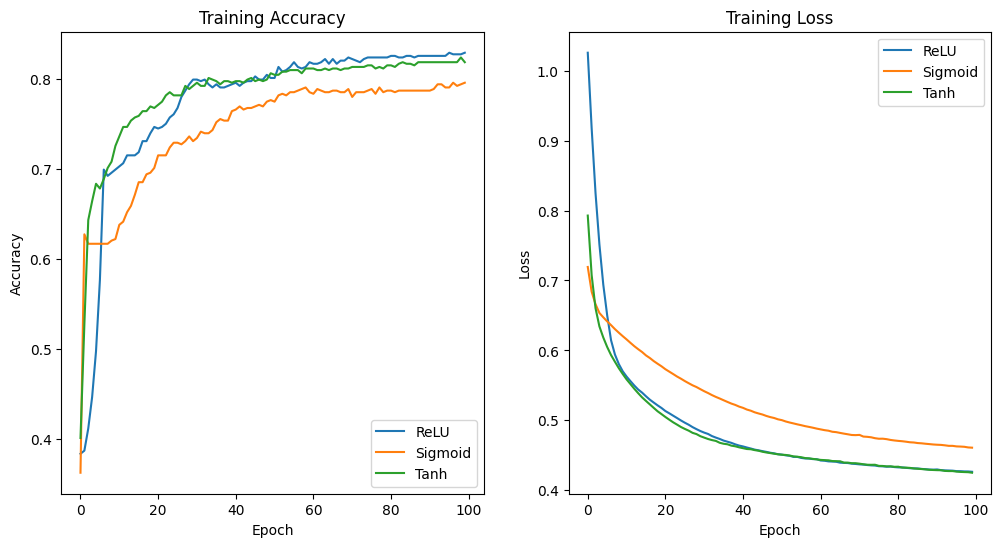

In [10]:
# Plot accuracy for all models
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_relu.history['accuracy'], label='ReLU')
plt.plot(history_sigmoid.history['accuracy'], label='Sigmoid')
plt.plot(history_tanh.history['accuracy'], label='Tanh')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_relu.history['loss'], label='ReLU')
plt.plot(history_sigmoid.history['loss'], label='Sigmoid')
plt.plot(history_tanh.history['loss'], label='Tanh')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Finally, let's compare the performance of the three models.

In [11]:
# Print the final test accuracies
print(f"ReLU Model Test Accuracy: {test_accuracy_relu:.2f}")
print(f"Sigmoid Model Test Accuracy: {test_accuracy_sigmoid:.2f}")
print(f"Tanh Model Test Accuracy: {test_accuracy_tanh:.2f}")

ReLU Model Test Accuracy: 0.83
Sigmoid Model Test Accuracy: 0.80
Tanh Model Test Accuracy: 0.81
